In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [11]:
print(data.columns)
print("Shape:", data.shape)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Shape: (7043, 21)


In [8]:
print(data.isna().sum())
print("----------------------------------------")
print(data.info())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 

In [9]:
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [13]:
for col in data.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}: {data[col].unique()}")


Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique values in gender: ['Female' 'Male']

Unique values in Partner: ['Yes' 'No']

Unique values in Dependents: ['No' 'Yes']

Unique values in PhoneService: ['No' 'Yes']

Unique values in MultipleLines: ['No phone service' 'No' 'Yes']

Unique values in InternetService: ['DSL' 'Fiber optic' 'No']

Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']

Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']

Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']

Unique values in TechSupport: ['No' 'Yes' 'No internet service']

Unique values in StreamingTV: ['No' 'Yes' 'No internet service']

Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']

Unique values in Contract: ['Month-to-month' 'One year' 'Two year']

Unique values in PaperlessBilling: ['Yes' 'No']

Unique values in PaymentMethod: ['Electronic check' 'Maile

In [14]:
print(data['TotalCharges'].apply(lambda x: x == " ").sum())

11


In [17]:
# Convert blank or empty strings in object columns to NaN
df = data.applymap(lambda x: pd.NA if isinstance(x, str) and x.strip() == '' else x)


/var/folders/vd/qkvh43g14lgg12ynqx64yg6m0000gn/T/ipykernel_75282/1654773305.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = data.applymap(lambda x: pd.NA if isinstance(x, str) and x.strip() == '' else x)


In [21]:
# Drop rows with NaN in important columns (like total_charges)
data = data.dropna(subset=['TotalCharges'])


## Churn rates analysis

In [24]:
# Overall churn rate
churn_rate = data['Churn'].value_counts(normalize=True) * 100
print("Churn rate:\n", churn_rate)


Churn rate:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


## Oops 26% of customers are cancelling the subscription, it slike 1 in 4 customers are closing the account.

# Lets see which factors or segments are affencting the churn rate

### Churn by contract type

In [25]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print(contract_churn)


Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


In [28]:
services = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for service in services:
    print(f"\nChurn by {service}:")
    print(pd.crosstab(data[service], data['Churn'], normalize='index') * 100)



Churn by OnlineSecurity:
Churn                       No        Yes
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194

Churn by TechSupport:
Churn                       No        Yes
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341

Churn by StreamingTV:
Churn                       No        Yes
StreamingTV                              
No                   66.476868  33.523132
No internet service  92.595020   7.404980
Yes                  69.929812  30.070188

Churn by StreamingMovies:
Churn                       No        Yes
StreamingMovies                          
No                   66.319569  33.680431
No internet service  92.595020   7.404980
Yes                  70.058565  29.941435


## Insights from above

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features to analyze
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create a DataFrame to store churn rates
churn_summary = []

for col in cat_cols:
    churn_by_category = data.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_by_category = churn_by_category.reset_index()
    churn_by_category['feature'] = col
    churn_summary.append(churn_by_category)





In [31]:
churn_df = pd.concat(churn_summary)

# Filter for only 'Yes' churn
churn_df = churn_df[['feature', col, 'Yes']]
churn_df = churn_df.rename(columns={col: 'category', 'Yes': 'churn_rate'})

/var/folders/vd/qkvh43g14lgg12ynqx64yg6m0000gn/T/ipykernel_75282/112374028.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_df.head(20), x='churn_rate', y='combined_label', palette='viridis')


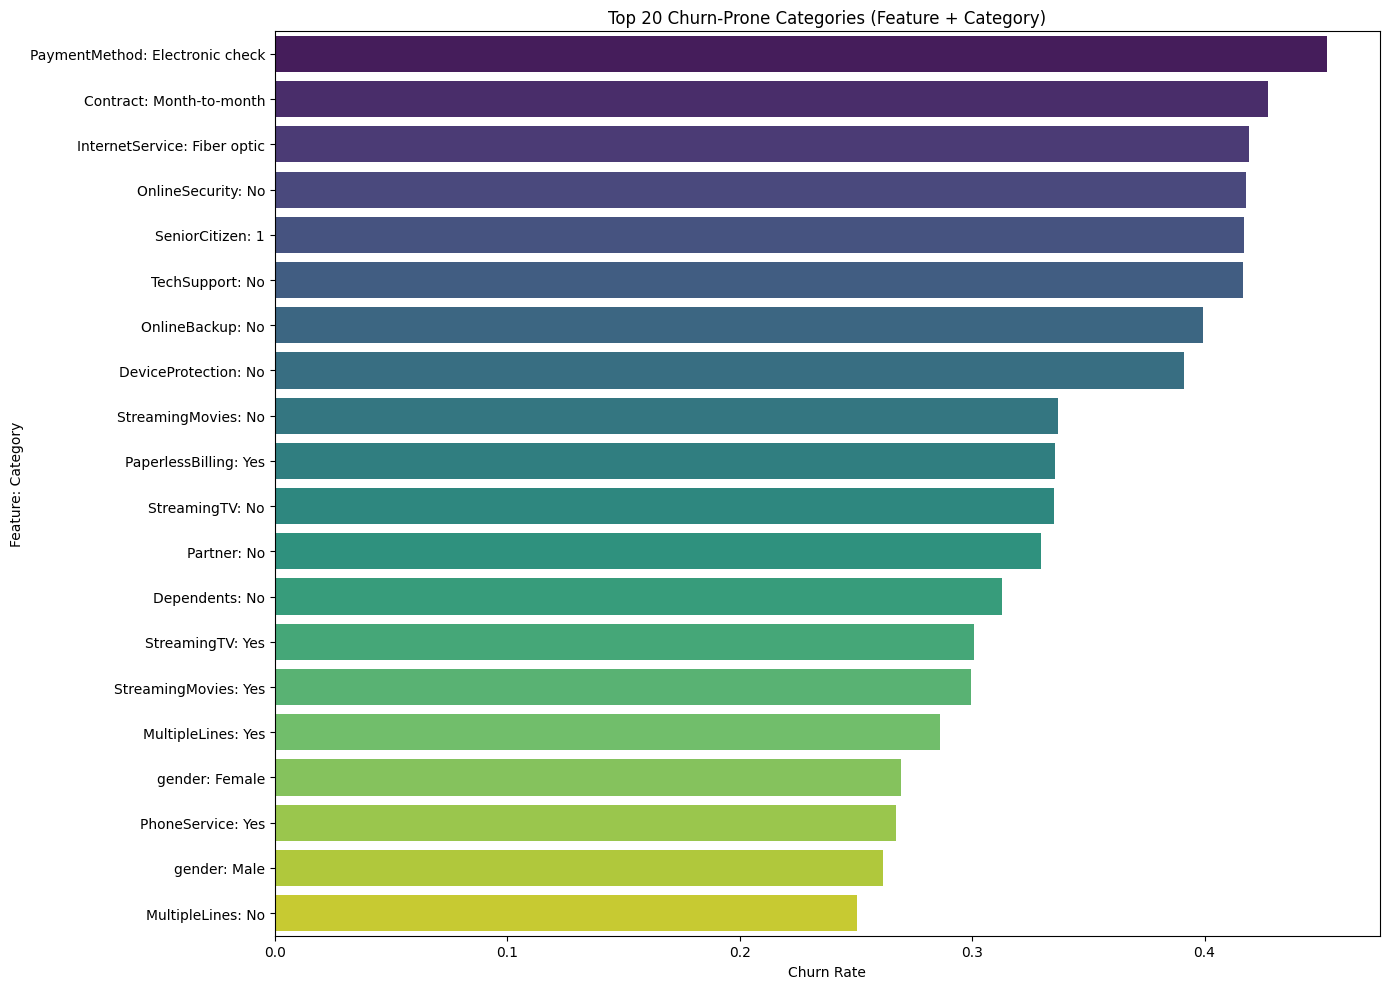

In [34]:
# Rebuild dataframe with combined labels
churn_df['combined_label'] = churn_df['feature'] + ': ' + churn_df['category'].astype(str)

# Sort again by churn rate
churn_df = churn_df.sort_values(by='churn_rate', ascending=False)

# Plot
plt.figure(figsize=(14, 10))
sns.barplot(data=churn_df.head(20), x='churn_rate', y='combined_label', palette='viridis')
plt.title('Top 20 Churn-Prone Categories (Feature + Category)')
plt.xlabel('Churn Rate')
plt.ylabel('Feature: Category')
plt.tight_layout()
plt.show()


## Key Observations

1. Electronic check users churn more likely because it’s manual, friction-heavy, and signals lower trust or engagement.
SOLUTION - Encourage customers to switch to auto pay, educate with billing transparency, to lower financial stress - offer flexible plans or renewal grace periods


## SaaS Metrics Calculation

Monthly Recurring Rate (MRR)

In [35]:
# Active customers only
active_customers = df[df['Churn'] == 'No']
mrr = active_customers['MonthlyCharges'].sum()
print("MRR (Current Active Customers):", mrr)


MRR (Current Active Customers): 316985.75


In [36]:
lost_revenue = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()
print("Revenue Lost This Month Due to Churn:", lost_revenue)


Revenue Lost This Month Due to Churn: 139130.85


## Phase 1

## 1. first convert numerical to categorical 
## 2. Dropping customer_id and churn because , no need to train on customer_id and since we created churn_flag, Churn wiuld be redundant
## 3. 

In [37]:
data['churn_flag'] = data['Churn'].map({'Yes': 1, 'No': 0})


In [40]:
data = data.drop(['customerID', 'Churn'], axis=1)


In [41]:
df_encoded = pd.get_dummies(data, drop_first=True)


In [42]:
X = df_encoded.drop('churn_flag', axis=1)
y = df_encoded['churn_flag']


## checking for ratios in churn rate

In [47]:
print("Original churn rate:", y.mean())


Original churn rate: 0.2653698707936959


In [48]:
from sklearn.model_selection import train_test_split

# Without stratification
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train churn rate (no stratify):", y_train_ns.mean())
print("Test churn rate (no stratify):", y_test_ns.mean())


Train churn rate (no stratify): 0.2655307064252751
Test churn rate (no stratify): 0.26472675656493966


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict churn probabilities
y_pred_proba = lr.predict_proba(X_test)[:, 1]


In [45]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report

# Classify as churn if probability > 0.5
y_pred_class = (y_pred_proba > 0.5).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred_class))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

ROC AUC Score: 0.8607826037450702


In [46]:
# Add predicted churn probability to the original DataFrame
df_encoded['churn_probability'] = lr.predict_proba(X)[:, 1]

# Mark high-risk customers (tune threshold if needed)
df_encoded['high_risk'] = df_encoded['churn_probability'] > 0.6


## Adding class weights

In [49]:


lr_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_balanced.fit(X_train, y_train)

y_pred_proba_balanced = lr_balanced.predict_proba(X_test)[:, 1]
y_pred_balanced = (y_pred_proba_balanced > 0.5).astype(int)



print("Balanced Logistic Regression:")
print(classification_report(y_test, y_pred_balanced))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_balanced))


Balanced Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.79      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409

ROC AUC Score: 0.8605936940387342


## Different thresholds

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities on test set
y_pred_proba_dt = lr.predict_proba(X_test)[:, 1]

# Try different thresholds
thresholds = [0.3, 0.4, 0.5, 0.6]

for thresh in thresholds:
    print(f"\n--- Threshold: {thresh} ---")
    y_pred_thresh = (y_pred_proba_dt >= thresh).astype(int)
    
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"F1 Score:  {f1:.3f}")



--- Threshold: 0.3 ---
Precision: 0.554
Recall:    0.788
F1 Score:  0.650

--- Threshold: 0.4 ---
Precision: 0.613
Recall:    0.692
F1 Score:  0.650

--- Threshold: 0.5 ---
Precision: 0.696
Recall:    0.595
F1 Score:  0.642

--- Threshold: 0.6 ---
Precision: 0.748
Recall:    0.429
F1 Score:  0.545


🧠 What You Should Do (Based on Use Case)
Goal	Best Threshold
Retain as many churners as possible	0.3 or 0.4
Want fewer false positives (e.g., limited budget)	0.5 or 0.6
Balanced view	0.4 (same F1 as 0.3 but better precision) ✅

✅ Recommendation
Stick with threshold = 0.4 for now:

Best balance of precision (0.61) and recall (0.69)

Best F1 score among the tested ones

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier


# 1. Initialize the model
rf = RandomForestClassifier(
    n_estimators=100,             # Number of trees
    max_depth=None,               # Let it grow fully
    class_weight='balanced',      # Fix imbalance
    random_state=42               # Reproducibility
)

# 2. Fit the model
rf.fit(X_train, y_train)

# 3. Predict churn
y_pred = rf.predict(X_test)

# 4. Predict probabilities (for ROC-AUC or threshold tuning)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# 5. Print evaluation metrics
print(" Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")


 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC Score: 0.85


In [52]:
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Try multiple thresholds
thresholds = [0.3, 0.4, 0.5, 0.6]

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba_rf >= threshold).astype(int)
    
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    
    print(f"\n--- Threshold: {threshold} ---")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"F1 Score:  {f1:.3f}")


--- Threshold: 0.3 ---
Precision: 0.545
Recall:    0.794
F1 Score:  0.646

--- Threshold: 0.4 ---
Precision: 0.605
Recall:    0.657
F1 Score:  0.630

--- Threshold: 0.5 ---
Precision: 0.658
Recall:    0.515
F1 Score:  0.577

--- Threshold: 0.6 ---
Precision: 0.708
Recall:    0.383
F1 Score:  0.497


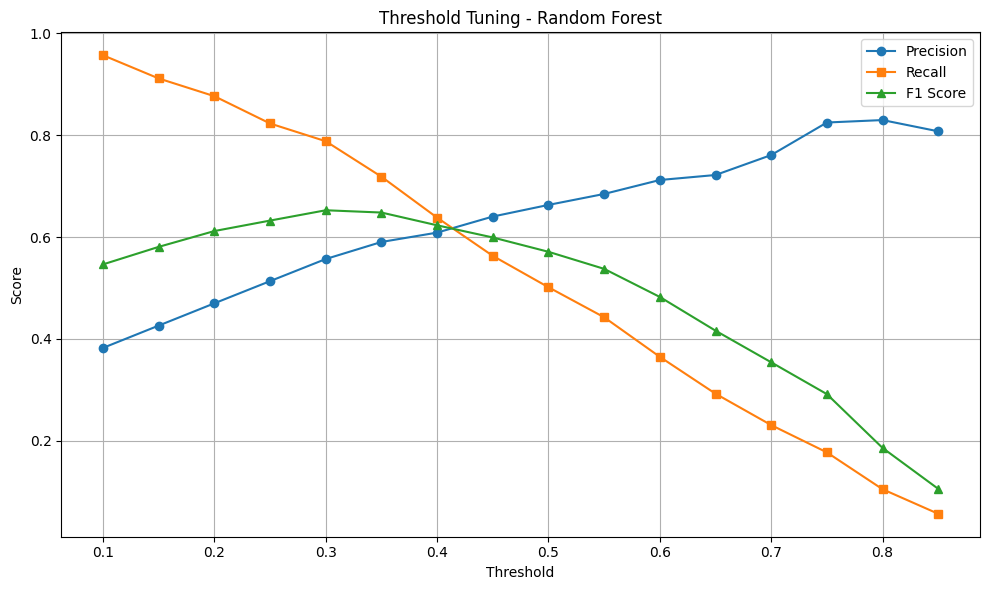

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate threshold values
thresholds = np.arange(0.1, 0.9, 0.05)
precisions = []
recalls = []
f1s = []

for thresh in thresholds:
    y_thresh = (y_pred_proba_rf >= thresh).astype(int)
    precisions.append(precision_score(y_test, y_thresh))
    recalls.append(recall_score(y_test, y_thresh))
    f1s.append(f1_score(y_test, y_thresh))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='s')
plt.plot(thresholds, f1s, label='F1 Score', marker='^')

plt.title("Threshold Tuning - Random Forest")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
from xgboost import XGBClassifier


# Step 1: Calculate scale_pos_weight
# Formula: (Number of negative class) / (Number of positive class)
neg, pos = y_train.value_counts()
scale = neg / pos

# Step 2: Train the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale, random_state=42)
xgb.fit(X_train, y_train)

# Step 3: Predictions
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Step 4: Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:27:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1036
           1       0.54      0.73      0.62       373

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.73      1409
weighted avg       0.80      0.77      0.77      1409

ROC AUC Score: 0.838737099796081


## Tuning XG boost

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.3, 0.4, 0.5, 0.6]
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]  # Adjust variable if needed

for thresh in thresholds:
    y_pred_thresh = (y_proba_xgb >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    
    print(f"--- Threshold: {thresh} ---")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"F1 Score:  {f1:.3f}\n")


--- Threshold: 0.3 ---
Precision: 0.463
Recall:    0.845
F1 Score:  0.598

--- Threshold: 0.4 ---
Precision: 0.492
Recall:    0.788
F1 Score:  0.606

--- Threshold: 0.5 ---
Precision: 0.542
Recall:    0.727
F1 Score:  0.621

--- Threshold: 0.6 ---
Precision: 0.585
Recall:    0.646
F1 Score:  0.614



Stick with 0.5 unless:

Your business wants to prioritize catching all churners → go with 0.4

Your business wants to avoid false positives → go with 0.6

In [60]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 3]
}

xgb_1 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb_1,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:44:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:44:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:44:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:44:54] WARN

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 2, 'subsample': 0.8}
Best F1 Score: 0.628516406996905
